1. Import Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("Building_Energy_Benchmarking_Data__2015-Present_20250302.csv")

# 
df.shape

# Afficher les premières et dernières lignes
df.head()
df.tail()

# Vérifier la taille du dataset
print(f"Shape du dataset: {df.shape}")

# Vérifier les noms des colonnes
print(f"Noms des colonnes: {df.columns}")

# Obtenir un aperçu général des types de données et des valeurs manquantes
df.info()

# Vérifier le type des colonnes
df.dtypes

# 
n = 10  # Nombre d'échantillons souhaités
df.sample(n)


# Vérifier la présence de valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Shape du dataset: (30616, 46)
Noms des colonnes: Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuildings', 'PropertyGFAParking', 'SelfReportGFATotal',
       'SelfReportGFABuildings', 'SelfReportParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electric

NumberofFloors                        83
NumberofBuildings                    294
ENERGYSTARScore                     7917
SiteEUIWN(kBtu/sf)                  1166
SiteEUI(kBtu/sf)                     856
SiteEnergyUse(kBtu)                  851
SiteEnergyUseWN(kBtu)               1161
SourceEUIWN(kBtu/sf)                1166
SourceEUI(kBtu/sf)                   856
LargestPropertyUseType                 8
LargestPropertyUseTypeGFA              3
SecondLargestPropertyUseType       13102
SecondLargestPropertyUseTypeGFA    13102
ThirdLargestPropertyUseType        23927
ThirdLargestPropertyUseTypeGFA     24088
Electricity(kWh)                     541
SteamUse(kBtu)                     29559
NaturalGas(therms)                 11448
ComplianceIssue                      345
Electricity(kBtu)                    541
NaturalGas(kBtu)                   11448
TotalGHGEmissions                    457
GHGEmissionsIntensity                459
dtype: int64

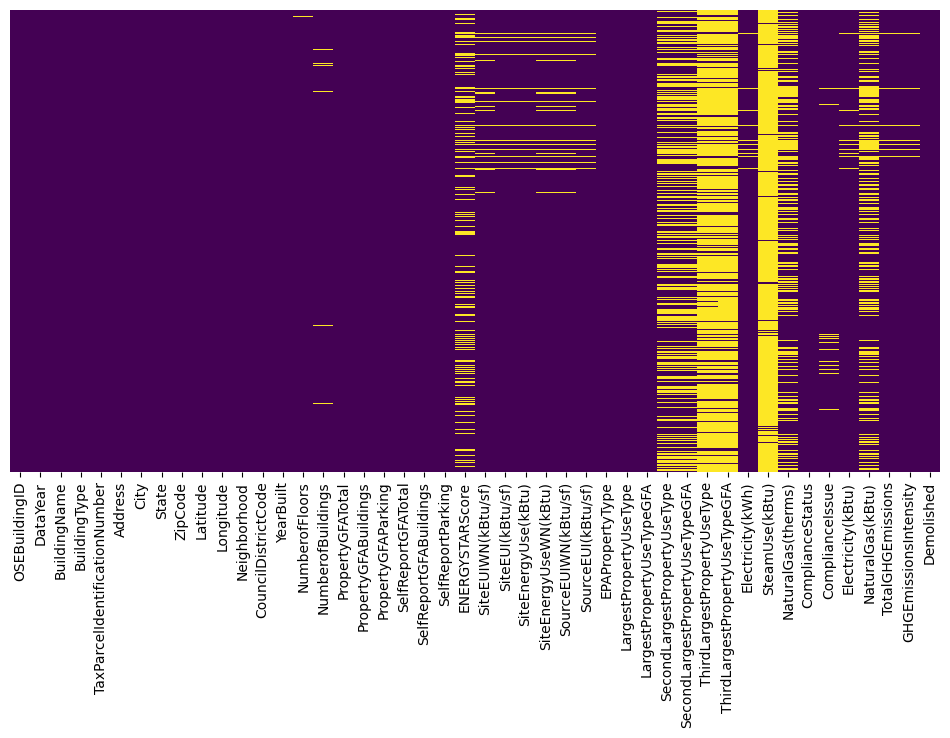

In [7]:
#Visualiser les valeurs manquantes avec un heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Vérification des valeurs manquantes avant traitement
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\n📊 Pourcentage de valeurs manquantes par colonne avant traitement :")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# 2️⃣ Suppression des colonnes avec plus de 70% de valeurs manquantes
threshold = 70
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"\n🗑️ Colonnes supprimées ({len(cols_to_drop)}): {list(cols_to_drop)}")
print(f"🔄 Nouvelle shape du dataset après suppression : {df.shape}")

# 3️⃣ Imputation des valeurs numériques manquantes (médiane)
num_cols = df.select_dtypes(include=['number']).columns  # Sélection automatique des colonnes numériques
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

print("\n✅ Imputation des valeurs numériques avec la médiane terminée.")

# 4️⃣ Imputation des valeurs catégoriques manquantes (remplacement par 'Unknown')
cat_cols = df.select_dtypes(include=['object']).columns  # Sélection automatique des colonnes catégoriques
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("\n✅ Imputation des valeurs catégoriques terminée.")

# 5️⃣ Vérification finale des valeurs manquantes
missing_after = df.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

print("\n🔍 Vérification finale des valeurs manquantes après traitement :")
if remaining_missing.empty:
    print("✅ Aucune valeur manquante restante.")
else:
    print(remaining_missing)

# 📊 Visualisation des valeurs manquantes après traitement
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valeurs manquantes après traitement")
plt.show()



⚠️ Nombre de valeurs manquantes par colonne :
NumberofFloors                        83
NumberofBuildings                    294
ENERGYSTARScore                     7917
SiteEUIWN(kBtu/sf)                  1166
SiteEUI(kBtu/sf)                     856
SiteEnergyUse(kBtu)                  851
SiteEnergyUseWN(kBtu)               1161
SourceEUIWN(kBtu/sf)                1166
SourceEUI(kBtu/sf)                   856
LargestPropertyUseType                 8
LargestPropertyUseTypeGFA              3
SecondLargestPropertyUseType       13102
SecondLargestPropertyUseTypeGFA    13102
ThirdLargestPropertyUseType        23927
ThirdLargestPropertyUseTypeGFA     24088
Electricity(kWh)                     541
SteamUse(kBtu)                     29559
NaturalGas(therms)                 11448
ComplianceIssue                      345
Electricity(kBtu)                    541
NaturalGas(kBtu)                   11448
TotalGHGEmissions                    457
GHGEmissionsIntensity                459
dtype: int

C:\Users\CCC\AppData\Local\Temp\ipykernel_19332\2997874878.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\CCC\AppData\Local\Temp\ipykernel_19332\2997874878.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example